In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Load the dataset
df = pd.read_csv("Employee.csv")

In [5]:
df.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
# 1. Data Exploration

In [11]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_counts = {col: df[col].nunique() for col in df.columns}

In [13]:
unique_values
unique_counts

{'Company': 6, 'Age': 29, 'Salary': 40, 'Place': 11, 'Country': 1, 'Gender': 2}

In [15]:
unique_table = pd.DataFrame({
    'Column': unique_values.keys(),
    'Unique Values': [', '.join(map(str, unique_values[col])) for col in unique_values.keys()],
    'Count of Unique Values': unique_counts.values()
})

In [17]:
unique_table

,Column,Unique Values,Count of Unique Values
0,Company,"TCS, Infosys, CTS, nan, Tata Consultancy Servi...",6
1,Age,"20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0,...",29
2,Salary,"nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7...",40
3,Place,"Chennai, Mumbai, Calcutta, Delhi, Podicherry, ...",11
4,Country,India,1
5,Gender,"0, 1",2


In [19]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [21]:
# 2. Data Cleaning

In [23]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [25]:
df['Age'] = df['Age'].replace(0, np.nan)

In [29]:
df['Salary']=df['Salary'].fillna(df['Salary'].median())
df['Age']=df['Age'].fillna(df['Age'].median())

In [31]:
df.isnull().sum()

Company     8
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

In [33]:
Company_mode = df['Company'].mode()
Place_mode = df['Place'].mode()

In [35]:
print("Company mode", "\n", Company_mode, "\n")
print("Place mode", "\n", Place_mode)

Company mode 
 0    TCS
Name: Company, dtype: object 

Place mode 
 0    Mumbai
Name: Place, dtype: object


In [41]:
df['Company'] = df['Company'].astype(str)
df['Place'] = df['Place'].astype(str)

In [43]:
df['Company'] = df['Company'].fillna(Company_mode)
df['Place'] = df['Place'].fillna(Place_mode)

In [45]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [47]:
df.duplicated().sum()

4

In [49]:
data = df.drop_duplicates()

In [53]:
data.duplicated().sum()

0

In [55]:
data['Gender'] = data['Gender'].map({0: 'M', 1: 'F'})

C:\Users\vayal\AppData\Local\Temp\ipykernel_21308\2415818966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map({0: 'M', 1: 'F'})


In [57]:
data.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,M
1,Infosys,30.0,5000.0,Mumbai,India,M
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M


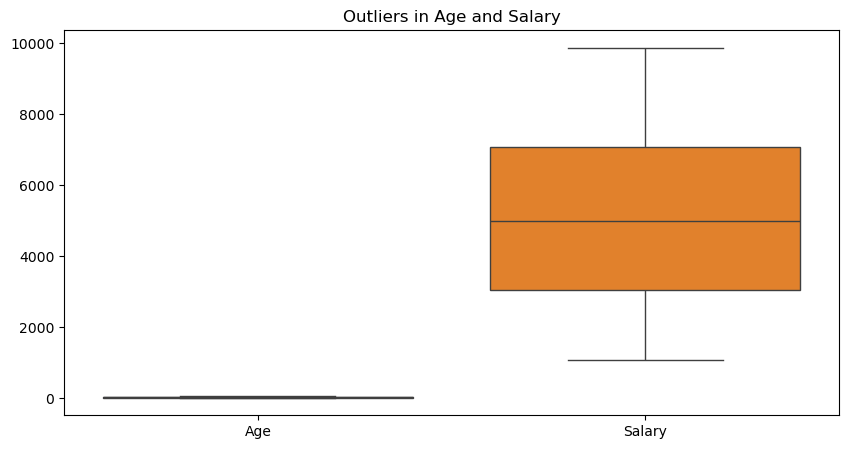

In [59]:
# Detect outliers using boxplots
plt.figure(figsize=(10, 5))
sb.boxplot(data=data[['Age', 'Salary']])
plt.title('Outliers in Age and Salary')
plt.show()

In [61]:
# 3. Data Analysis

In [63]:
# Filter data where age > 40 and salary < 5000
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,M
32,Infosys,45.0,4034.0,Calcutta,India,M
39,Infosys,41.0,3000.0,Mumbai,India,M
50,Infosys,41.0,3000.0,Chennai,India,M
57,Infosys,51.0,3184.0,Hyderabad,India,M
68,Infosys,43.0,4034.0,Mumbai,India,M
75,Infosys,44.0,3000.0,Cochin,India,M
86,Infosys,41.0,3000.0,Delhi,India,M
93,Infosys,54.0,3184.0,Mumbai,India,M
104,Infosys,44.0,4034.0,Delhi,India,M


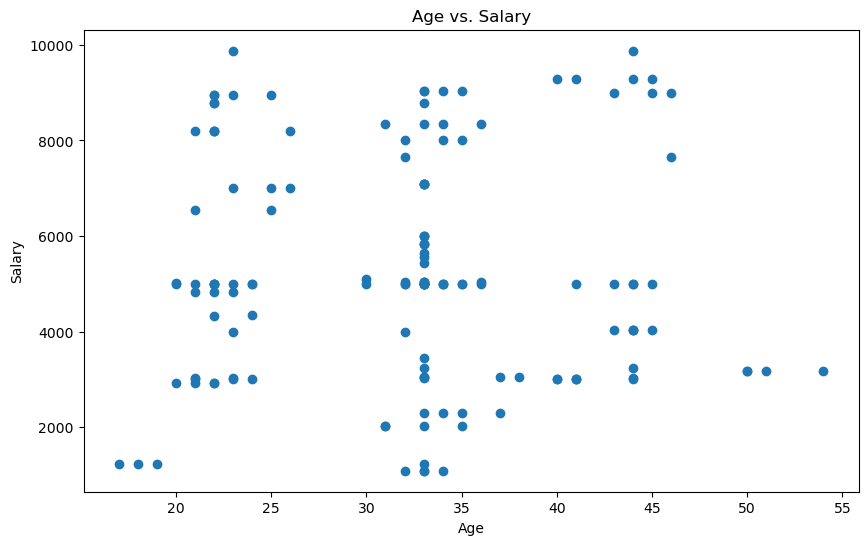

In [65]:
# Plotting age vs. salary
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Salary'])
plt.title("Age vs. Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

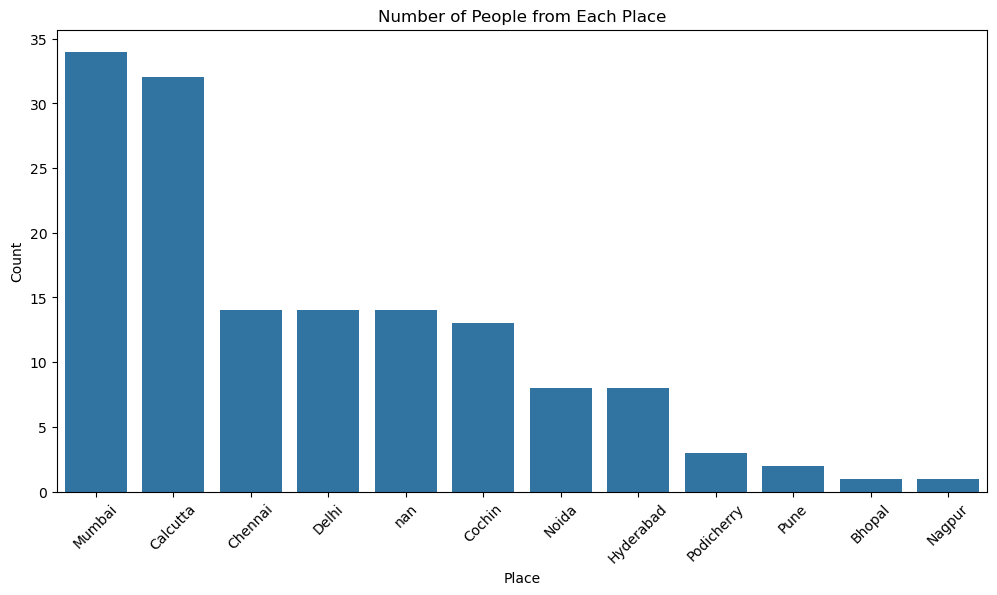

In [67]:
# Count number of people from each place and visualize
place_count = data['Place'].value_counts()
plt.figure(figsize=(12, 6))
sb.barplot(x=place_count.index, y=place_count.values)
plt.title("Number of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [69]:
# 4. Data Encoding

In [71]:
# Label encoding for binary categorical features
le = LabelEncoder()

In [73]:
data['Gender_Encoded'] = le.fit_transform(data['Gender'])
data['Company_Encoded'] = le.fit_transform(data['Company'])
data['Place_Encoded'] = le.fit_transform(data['Place'])

C:\Users\vayal\AppData\Local\Temp\ipykernel_21308\1966329664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender_Encoded'] = le.fit_transform(data['Gender'])
C:\Users\vayal\AppData\Local\Temp\ipykernel_21308\1966329664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Company_Encoded'] = le.fit_transform(data['Company'])
C:\Users\vayal\AppData\Local\Temp\ipykernel_21308\1966329664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [75]:
data.head(10)

,Company,Age,Salary,Place,Country,Gender,Gender_Encoded,Company_Encoded,Place_Encoded
0,TCS,20.0,5000.0,Chennai,India,M,1,4,2
1,Infosys,30.0,5000.0,Mumbai,India,M,1,2,6
2,TCS,35.0,2300.0,Calcutta,India,M,1,4,1
3,Infosys,40.0,3000.0,Delhi,India,M,1,2,4
4,TCS,23.0,4000.0,Mumbai,India,M,1,4,6
5,Infosys,33.0,5000.0,Calcutta,India,M,1,2,1
6,TCS,33.0,6000.0,Chennai,India,F,0,4,2
7,Infosys,23.0,7000.0,Mumbai,India,F,0,2,6
8,TCS,34.0,8000.0,Calcutta,India,F,0,4,1
9,CTS,45.0,9000.0,Delhi,India,M,1,0,4


In [77]:
# One-hot encoding for multi-category features
oh = pd.get_dummies(data['Gender_Encoded'],prefix = 'Gender')
data = pd.concat([data,oh],axis=1)

In [79]:
data.head(3)

,Company,Age,Salary,Place,Country,Gender,Gender_Encoded,Company_Encoded,Place_Encoded,Gender_0,Gender_1
0,TCS,20.0,5000.0,Chennai,India,M,1,4,2,False,True
1,Infosys,30.0,5000.0,Mumbai,India,M,1,2,6,False,True
2,TCS,35.0,2300.0,Calcutta,India,M,1,4,1,False,True


In [81]:
oh1 = pd.get_dummies(data['Company_Encoded'],prefix = 'Company')
data = pd.concat([data,oh1],axis=1)

In [83]:
data.head(3)

,Company,Age,Salary,Place,Country,Gender,Gender_Encoded,Company_Encoded,Place_Encoded,Gender_0,Gender_1,Company_0,Company_1,Company_2,Company_3,Company_4,Company_5,Company_6
0,TCS,20.0,5000.0,Chennai,India,M,1,4,2,False,True,False,False,False,False,True,False,False
1,Infosys,30.0,5000.0,Mumbai,India,M,1,2,6,False,True,False,False,True,False,False,False,False
2,TCS,35.0,2300.0,Calcutta,India,M,1,4,1,False,True,False,False,False,False,True,False,False


In [85]:
oh2 = pd.get_dummies(data['Place_Encoded'],prefix = 'Place')
data = pd.concat([data,oh2],axis=1)

In [87]:
data.head(3)

,Company,Age,Salary,Place,Country,Gender,Gender_Encoded,Company_Encoded,Place_Encoded,Gender_0,...,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11
0,TCS,20.0,5000.0,Chennai,India,M,1,4,2,False,...,True,False,False,False,False,False,False,False,False,False
1,Infosys,30.0,5000.0,Mumbai,India,M,1,2,6,False,...,False,False,False,False,True,False,False,False,False,False
2,TCS,35.0,2300.0,Calcutta,India,M,1,4,1,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
# 5. Feature Scaling:

In [91]:
# Apply StandardScaler
scaler = StandardScaler()

In [93]:
data[['Age_Std', 'Salary_Std']] = scaler.fit_transform(data[['Age', 'Salary']])

In [95]:
data.head(3)

,Company,Age,Salary,Place,Country,Gender,Gender_Encoded,Company_Encoded,Place_Encoded,Gender_0,...,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11,Age_Std,Salary_Std
0,TCS,20.0,5000.0,Chennai,India,M,1,4,2,False,...,False,False,False,False,False,False,False,False,-1.484676,-0.100827
1,Infosys,30.0,5000.0,Mumbai,India,M,1,2,6,False,...,False,False,True,False,False,False,False,False,-0.267174,-0.100827
2,TCS,35.0,2300.0,Calcutta,India,M,1,4,1,False,...,False,False,False,False,False,False,False,False,0.341577,-1.243735


In [97]:
# Apply MinMaxScaler
min_max_scaler = MinMaxScaler()

In [99]:
data[['Age_M', 'Salary_M']] = min_max_scaler.fit_transform(data[['Age', 'Salary']])

In [101]:
data.head(3)

,Company,Age,Salary,Place,Country,Gender,Gender_Encoded,Company_Encoded,Place_Encoded,Gender_0,...,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11,Age_Std,Salary_Std,Age_M,Salary_M
0,TCS,20.0,5000.0,Chennai,India,M,1,4,2,False,...,False,False,False,False,False,False,-1.484676,-0.100827,0.081081,0.445089
1,Infosys,30.0,5000.0,Mumbai,India,M,1,2,6,False,...,True,False,False,False,False,False,-0.267174,-0.100827,0.351351,0.445089
2,TCS,35.0,2300.0,Calcutta,India,M,1,4,1,False,...,False,False,False,False,False,False,0.341577,-1.243735,0.486486,0.137817


In [103]:
# Save cleaned and processed data to a new CSV file
data.to_csv('Processed_Employee_Data.csv')